In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('address_demographic.csv')

In [3]:
df.head()

,customer_id,address,postcode,state,country,property_valuation,customer_id.1,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,4.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,1-Feb,Yes,15.0
3,5.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,6.0,9 Oakridge Court,3216.0,VIC,Australia,9.0,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


default tab is non sense

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3999 non-null   float64
 1   address                              3999 non-null   object 
 2   postcode                             3999 non-null   float64
 3   state                                3999 non-null   object 
 4   country                              3999 non-null   object 
 5   property_valuation                   3999 non-null   float64
 6   customer_id.1                        4000 non-null   int64  
 7   first_name                           4000 non-null   object 
 8   last_name                            3875 non-null   object 
 9   gender                               4000 non-null   object 
 10  past_3_years_bike_related_purchases  4000 non-null   int64  
 11  DOB                           

In [5]:
df = df.drop(columns=['default'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3999 non-null   float64
 1   address                              3999 non-null   object 
 2   postcode                             3999 non-null   float64
 3   state                                3999 non-null   object 
 4   country                              3999 non-null   object 
 5   property_valuation                   3999 non-null   float64
 6   customer_id.1                        4000 non-null   int64  
 7   first_name                           4000 non-null   object 
 8   last_name                            3875 non-null   object 
 9   gender                               4000 non-null   object 
 10  past_3_years_bike_related_purchases  4000 non-null   int64  
 11  DOB                           

In [7]:
df = df.drop(columns=['last_name'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3999 non-null   float64
 1   address                              3999 non-null   object 
 2   postcode                             3999 non-null   float64
 3   state                                3999 non-null   object 
 4   country                              3999 non-null   object 
 5   property_valuation                   3999 non-null   float64
 6   customer_id.1                        4000 non-null   int64  
 7   first_name                           4000 non-null   object 
 8   gender                               4000 non-null   object 
 9   past_3_years_bike_related_purchases  4000 non-null   int64  
 10  DOB                                  3913 non-null   object 
 11  job_title                     

fill in job title with na and job category with na and tenure with mean? if they are blank

In [9]:
jobs = df['job_title']

In [10]:
df.isnull().sum()

customer_id                              1
address                                  1
postcode                                 1
state                                    1
country                                  1
property_valuation                       1
customer_id.1                            0
first_name                               0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [11]:
jobs.fillna('none', inplace=True)

In [12]:
jobs.nunique

<bound method IndexOpsMixin.nunique of 0          Executive Secretary
1       Administrative Officer
2           Recruiting Manager
3                         none
4                Senior Editor
                 ...          
3995     VP Product Management
3996           Statistician II
3997         Assistant Manager
3998                      none
3999      Software Engineer IV
Name: job_title, Length: 4000, dtype: object>

In [13]:
df['job_title'] = jobs

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3999 non-null   float64
 1   address                              3999 non-null   object 
 2   postcode                             3999 non-null   float64
 3   state                                3999 non-null   object 
 4   country                              3999 non-null   object 
 5   property_valuation                   3999 non-null   float64
 6   customer_id.1                        4000 non-null   int64  
 7   first_name                           4000 non-null   object 
 8   gender                               4000 non-null   object 
 9   past_3_years_bike_related_purchases  4000 non-null   int64  
 10  DOB                                  3913 non-null   object 
 11  job_title                     

In [15]:
industry = df['job_industry_category']

In [16]:
industry.fillna('none', inplace=True)

In [17]:
df['job_industry_category'] = industry

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3999 non-null   float64
 1   address                              3999 non-null   object 
 2   postcode                             3999 non-null   float64
 3   state                                3999 non-null   object 
 4   country                              3999 non-null   object 
 5   property_valuation                   3999 non-null   float64
 6   customer_id.1                        4000 non-null   int64  
 7   first_name                           4000 non-null   object 
 8   gender                               4000 non-null   object 
 9   past_3_years_bike_related_purchases  4000 non-null   int64  
 10  DOB                                  3913 non-null   object 
 11  job_title                     

In [19]:
df = df.dropna()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 0 to 3998
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3912 non-null   float64
 1   address                              3912 non-null   object 
 2   postcode                             3912 non-null   float64
 3   state                                3912 non-null   object 
 4   country                              3912 non-null   object 
 5   property_valuation                   3912 non-null   float64
 6   customer_id.1                        3912 non-null   int64  
 7   first_name                           3912 non-null   object 
 8   gender                               3912 non-null   object 
 9   past_3_years_bike_related_purchases  3912 non-null   int64  
 10  DOB                                  3912 non-null   object 
 11  job_title                     

In [21]:
dups = df.duplicated()

In [22]:
dups.value_counts()

False    3912
dtype: int64

In [23]:
df.nunique()

customer_id                            3912
address                                3909
postcode                                870
state                                     5
country                                   1
property_valuation                       12
customer_id.1                          3912
first_name                             3079
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3447
job_title                               196
job_industry_category                    10
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
dtype: int64

In [24]:
df['gender'].value_counts()

Female    2037
Male      1871
F            1
U            1
Femal        1
M            1
Name: gender, dtype: int64

# Female    2037
Male      1871
F            1
U            1
Femal        1
M            1

In [25]:
df["job_industry_category"] = df["job_industry_category"].astype("category").cat.codes

In [26]:
df["wealth_segment"] = df["wealth_segment"].astype("category").cat.codes

In [27]:
df["deceased_indicator"] = df["deceased_indicator"].astype("category").cat.codes


In [28]:
df["owns_car"] = df["owns_car"].astype("category").cat.codes


In [29]:
df["tenure"] = df["tenure"].astype("category").cat.codes


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 0 to 3998
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3912 non-null   float64
 1   address                              3912 non-null   object 
 2   postcode                             3912 non-null   float64
 3   state                                3912 non-null   object 
 4   country                              3912 non-null   object 
 5   property_valuation                   3912 non-null   float64
 6   customer_id.1                        3912 non-null   int64  
 7   first_name                           3912 non-null   object 
 8   gender                               3912 non-null   object 
 9   past_3_years_bike_related_purchases  3912 non-null   int64  
 10  DOB                                  3912 non-null   object 
 11  job_title                     

In [31]:
df["state"] = df["state"].astype("category").cat.codes


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 0 to 3998
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3912 non-null   float64
 1   address                              3912 non-null   object 
 2   postcode                             3912 non-null   float64
 3   state                                3912 non-null   int8   
 4   country                              3912 non-null   object 
 5   property_valuation                   3912 non-null   float64
 6   customer_id.1                        3912 non-null   int64  
 7   first_name                           3912 non-null   object 
 8   gender                               3912 non-null   object 
 9   past_3_years_bike_related_purchases  3912 non-null   int64  
 10  DOB                                  3912 non-null   object 
 11  job_title                     

In [34]:
df = df.drop(columns=['country'])

In [35]:
df

,customer_id,address,postcode,state,property_valuation,customer_id.1,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1.0,060 Morning Avenue,2016.0,1,10.0,1,Laraine,F,93,1953-10-12,Executive Secretary,3,2,0,1,10
1,2.0,6 Meadow Vale Court,2153.0,1,10.0,2,Eli,Male,81,1980-12-16,Administrative Officer,2,2,0,1,15
2,4.0,0 Holy Cross Court,4211.0,2,9.0,3,Arlin,Male,61,1954-01-20,Recruiting Manager,6,2,0,1,14
3,5.0,17979 Del Mar Point,2448.0,1,4.0,4,Talbot,Male,33,1961-10-03,none,4,2,0,0,6
4,6.0,9 Oakridge Court,3216.0,3,9.0,5,Sheila-kathryn,Female,56,1977-05-13,Senior Editor,9,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3998.0,736 Roxbury Junction,2540.0,0,6.0,3994,Stephie,Female,5,1989-04-07,Structural Analysis Engineer,5,0,0,0,11
3994,3999.0,1482 Hauk Trail,3064.0,3,3.0,3995,Rusty,Male,93,1975-12-12,Staff Scientist,5,2,0,1,13
3995,4000.0,57042 Village Green Point,4511.0,2,6.0,3996,Rosalia,Female,8,1975-08-09,VP Product Management,3,2,0,0,18
3996,4001.0,87 Crescent Oaks Alley,2756.0,0,10.0,3997,Blanch,Female,87,2001-07-13,Statistician II,5,1,0,1,0


<AxesSubplot:>

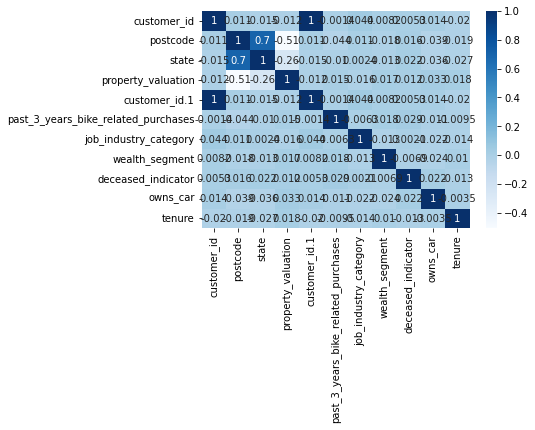

In [36]:
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

<AxesSubplot:>

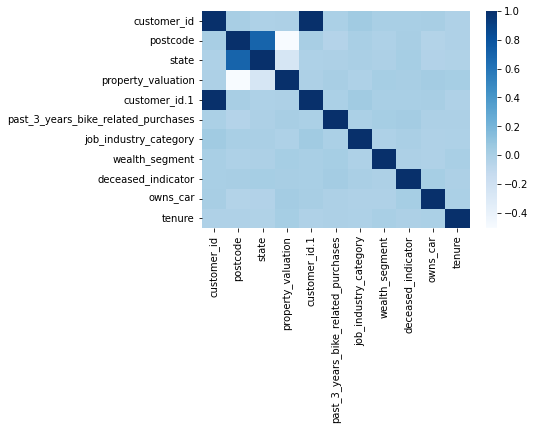

In [37]:
corr = df.corr()
sns.heatmap(corr, cmap="Blues")